In [97]:
# importing all the required libraries
import pandas as pd
import numpy as np
import re
from scipy.stats import chi2_contingency
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import category_encoders as ce
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix as cm

In [92]:
# Loadin the dataset
df=pd.read_csv('diabetic_data.csv')


In [93]:
# display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [94]:
df['diag_1'].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: diag_1, Length: 717, dtype: int64

In [95]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [96]:
# display first few rows
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
# Since the empty data in the data set are '?' value replacing the ? value with NAn 
df.replace('?', np.nan, inplace=True)

In [830]:
# Check for null values in the entire DataFrame
null_values = df.isnull()

# Count the number of null values in each column
null_count = df.isnull().sum()

# Display the null count for each column
print(null_count)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
unwanted_columns=['encounter_id','payer_code','medical_specialty','repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
new_df=df.drop(unwanted_columns, axis=1)

In [11]:
new_df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [12]:
len(new_df.columns)

26

In [14]:
len(new_df)

101766

In [447]:
# # Remove rows with NaN values
# df_cleaned = new_df.dropna()

In [448]:
# randomly selecting 10000 data from the cleaned dataset
sample_size=10000
new_sample_df=new_df.sample(n=sample_size)

In [449]:
# Saving the seleted data into new dataset
new_sample_df.to_csv('final_diabetic_hospital_dataset.csv', index=False)

In [98]:
final_df=pd.read_csv('final_diabetic_hospital_dataset.csv')
final_df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,insulin,change,diabetesMed,readmitted
0,58356459,Caucasian,Male,[60-70),NaN,2,1,1,9,9,...,331,707,9,None,None,No,Steady,No,Yes,>30
1,90337608,Caucasian,Female,[80-90),NaN,1,1,7,4,50,...,250,272,7,None,None,No,Steady,No,Yes,>30
2,95389182,Caucasian,Male,[50-60),NaN,3,22,1,4,31,...,730,785,8,None,None,No,Down,Ch,Yes,<30
3,24419052,Caucasian,Female,[80-90),NaN,1,3,17,4,18,...,599,780,9,Norm,None,No,No,No,No,NO
4,53116200,Caucasian,Male,[70-80),NaN,2,1,1,4,43,...,372,272,8,None,>8,No,No,Ch,Yes,>30


In [99]:
final_df.shape

(10000, 26)

In [100]:
final_df.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
insulin                     object
change                      object
diabetesMed                 object
readmitted                  object
dtype: object

In [101]:
# since the diag_1, diag_2, diag_3 contains more distinct categorical value instead of using the icd-9 code i am changing the code with actual diagnosis
# Define a mapping of code ranges to diagnosis names
code_ranges_to_diagnosis = {
    
    (1,139): 0,
    (240,279):0,
    (280,289):0,
    (290,319):0,
    (320,389):1,
    (390,459):1,
    (460, 519): 1,
    (520,579):1,
    (580,629):2,
    (630,679):2,
    (680,709):2,
    (710,739):2,
    (740,759):3,
    (760,779):3,
    (780,799):3,
    (800,999):3
    # Add more ranges and corresponding names as needed
}

def map_diag_codes_to_names(code):
    # Ensure the code is a string
    code = str(code)
    
    # Check if the code starts with 'V' or 'E' (indicating external injury)
    if code.startswith(('V', 'E')):
        return 4
    
    # Convert integer codes to float
    try:
        code = float(code)
        # Iterate through the code ranges and corresponding names
        for code_range, diagnosis_name in code_ranges_to_diagnosis.items():
            # Check if the code falls within the range
            if code_range[0] <= code <= code_range[1]:
                return diagnosis_name
        # If no match is found for the float, return 'Other Diagnosis'
        return 5
    except ValueError:
        # If the code cannot be converted to float, categorize it as 'Other Diagnosis'
        return 5


# Apply the mapping function to the diag_1 column
final_df['diag_1'] = final_df['diag_1'].apply(map_diag_codes_to_names)
final_df['diag_2'] = final_df['diag_2'].apply(map_diag_codes_to_names)
final_df['diag_3'] = final_df['diag_3'].apply(map_diag_codes_to_names)



# Performing data cleaning on selected data

In [102]:
# Check for null values in the entire DataFrame
null_values = final_df.isnull()

# Count the number of null values in each column
null_count = final_df.isnull().sum()

# Display the null count for each column
print(null_count)

patient_nbr                    0
race                         227
gender                         0
age                            0
weight                      9691
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                         0
diag_3                         0
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
insulin                        0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int64


In [103]:
# since the weight contain allmost all null values dropping the weight column
final_df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [104]:
final_df=final_df.drop(columns='weight')

In [105]:
final_df.shape

(10000, 25)

In [106]:
# Check for null values in the entire DataFrame
null_values = final_df.isnull()

# Count the number of null values in each column
null_count = final_df.isnull().sum()

# Display the null count for each column
print(null_count)

patient_nbr                   0
race                        227
gender                        0
age                           0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                        0
diag_2                        0
diag_3                        0
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
metformin                     0
insulin                       0
change                        0
diabetesMed                   0
readmitted                    0
dtype: int64


In [107]:
# Remove rows with NaN values
df_cleaned = final_df.dropna()

In [108]:
df_cleaned.shape

(9773, 25)

In [109]:
df_cleaned.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                       int64
diag_2                       int64
diag_3                       int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
insulin                     object
change                      object
diabetesMed                 object
readmitted                  object
dtype: object

In [110]:
# Check for null values in the entire DataFrame
null_values = df_cleaned.isnull()

# Count the number of null values in each column
null_count = df_cleaned.isnull().sum()

# Display the null count for each column
print(null_count)

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64


In [111]:
df_cleaned.shape

(9773, 25)

In [112]:
df_cleaned['age']

0       [60-70)
1       [80-90)
2       [50-60)
3       [80-90)
4       [70-80)
         ...   
9995    [70-80)
9996    [40-50)
9997    [40-50)
9998    [60-70)
9999    [70-80)
Name: age, Length: 9773, dtype: object

In [113]:
df_cleaned.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 9773, dtype: bool

In [114]:
# Remove duplicate rows and keep the first occurrence
df_cleaned = df_cleaned.drop_duplicates()

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
      patient_nbr             race  gender      age  admission_type_id  \
0        58356459        Caucasian    Male  [60-70)                  2   
1        90337608        Caucasian  Female  [80-90)                  1   
2        95389182        Caucasian    Male  [50-60)                  3   
3        24419052        Caucasian  Female  [80-90)                  1   
4        53116200        Caucasian    Male  [70-80)                  2   
...           ...              ...     ...      ...                ...   
9995     72822798  AfricanAmerican  Female  [70-80)                  1   
9996     85716540        Caucasian    Male  [40-50)                  1   
9997     84770820        Caucasian  Female  [40-50)                  1   
9998       216603  AfricanAmerican  Female  [60-70)                  1   
9999     60653889  AfricanAmerican    Male  [70-80)                  3   

      discharge_disposition_id  admission_source_id  time_in_hospital  \
0                  

In [116]:
df_cleaned.shape

(9773, 25)

In [117]:
# Since the data for age is in range value now converting the range value to continuous data by using median
# Define a function to extract numeric values from the age ranges

def extract_midpoint(age_range):
    match = re.search(r'(\d+)-(\d+)', age_range)
    if match:
        start = int(match.group(1))
        end = int(match.group(2))
        midpoint = (start + end) / 2
        return midpoint
    return None

# Apply the function to extract and calculate the midpoint
df_cleaned['age'] = df_cleaned['age'].apply(extract_midpoint)


In [118]:
df_cleaned.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [119]:
# Seperating the numeric and categorical dataset
numeric_columns = df_cleaned.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

In [120]:
len(categorical_columns)

9

# Univariate analysis

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

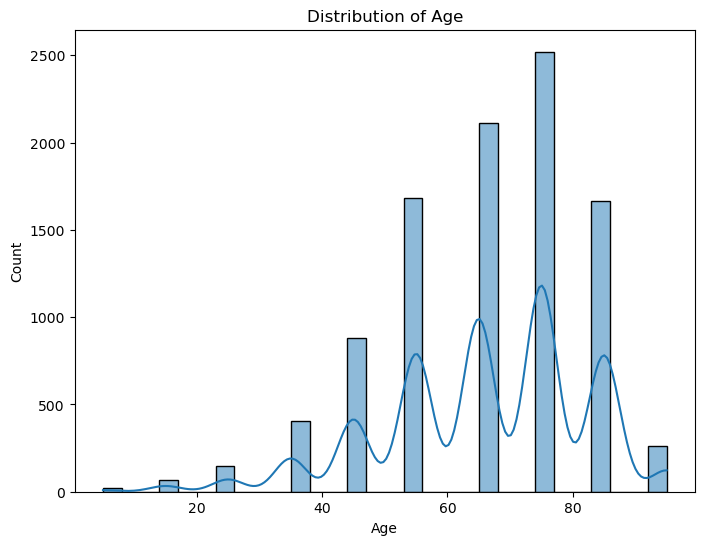

In [122]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x="age", bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Univariate analysis for categorical data

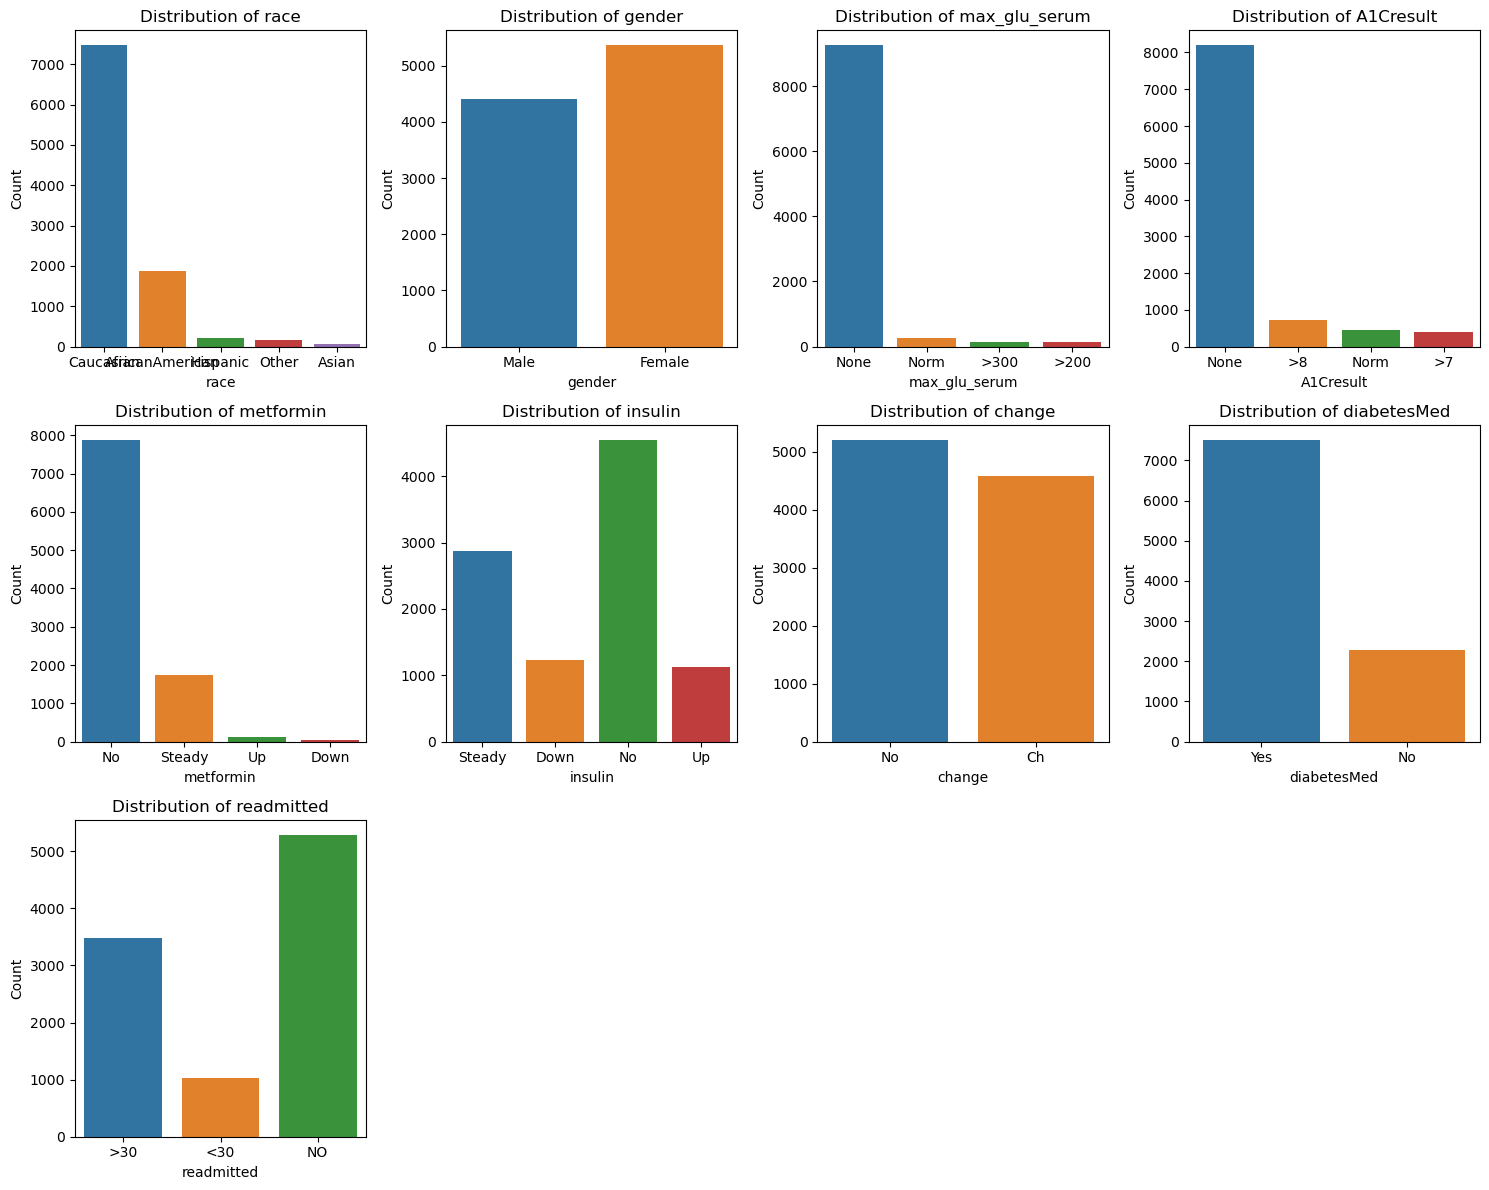

In [123]:


# Calculate the number of rows and columns needed
num_categories = len(categorical_columns)
num_rows = math.ceil(num_categories / 4)
num_columns = min(4, num_categories)

# Create a subplot grid for categorical variables
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4 * num_rows))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Create bar plots for each categorical variable
for i, col in enumerate(categorical_columns):
    row_index = i // num_columns
    col_index = i % num_columns
    sns.countplot(data=df_cleaned, x=col, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Count')

# Remove any empty subplots
for i in range(num_categories, num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('Categorical_univariate.jpg')
# Show the plots
plt.show()


Univariate analysis for numerical data

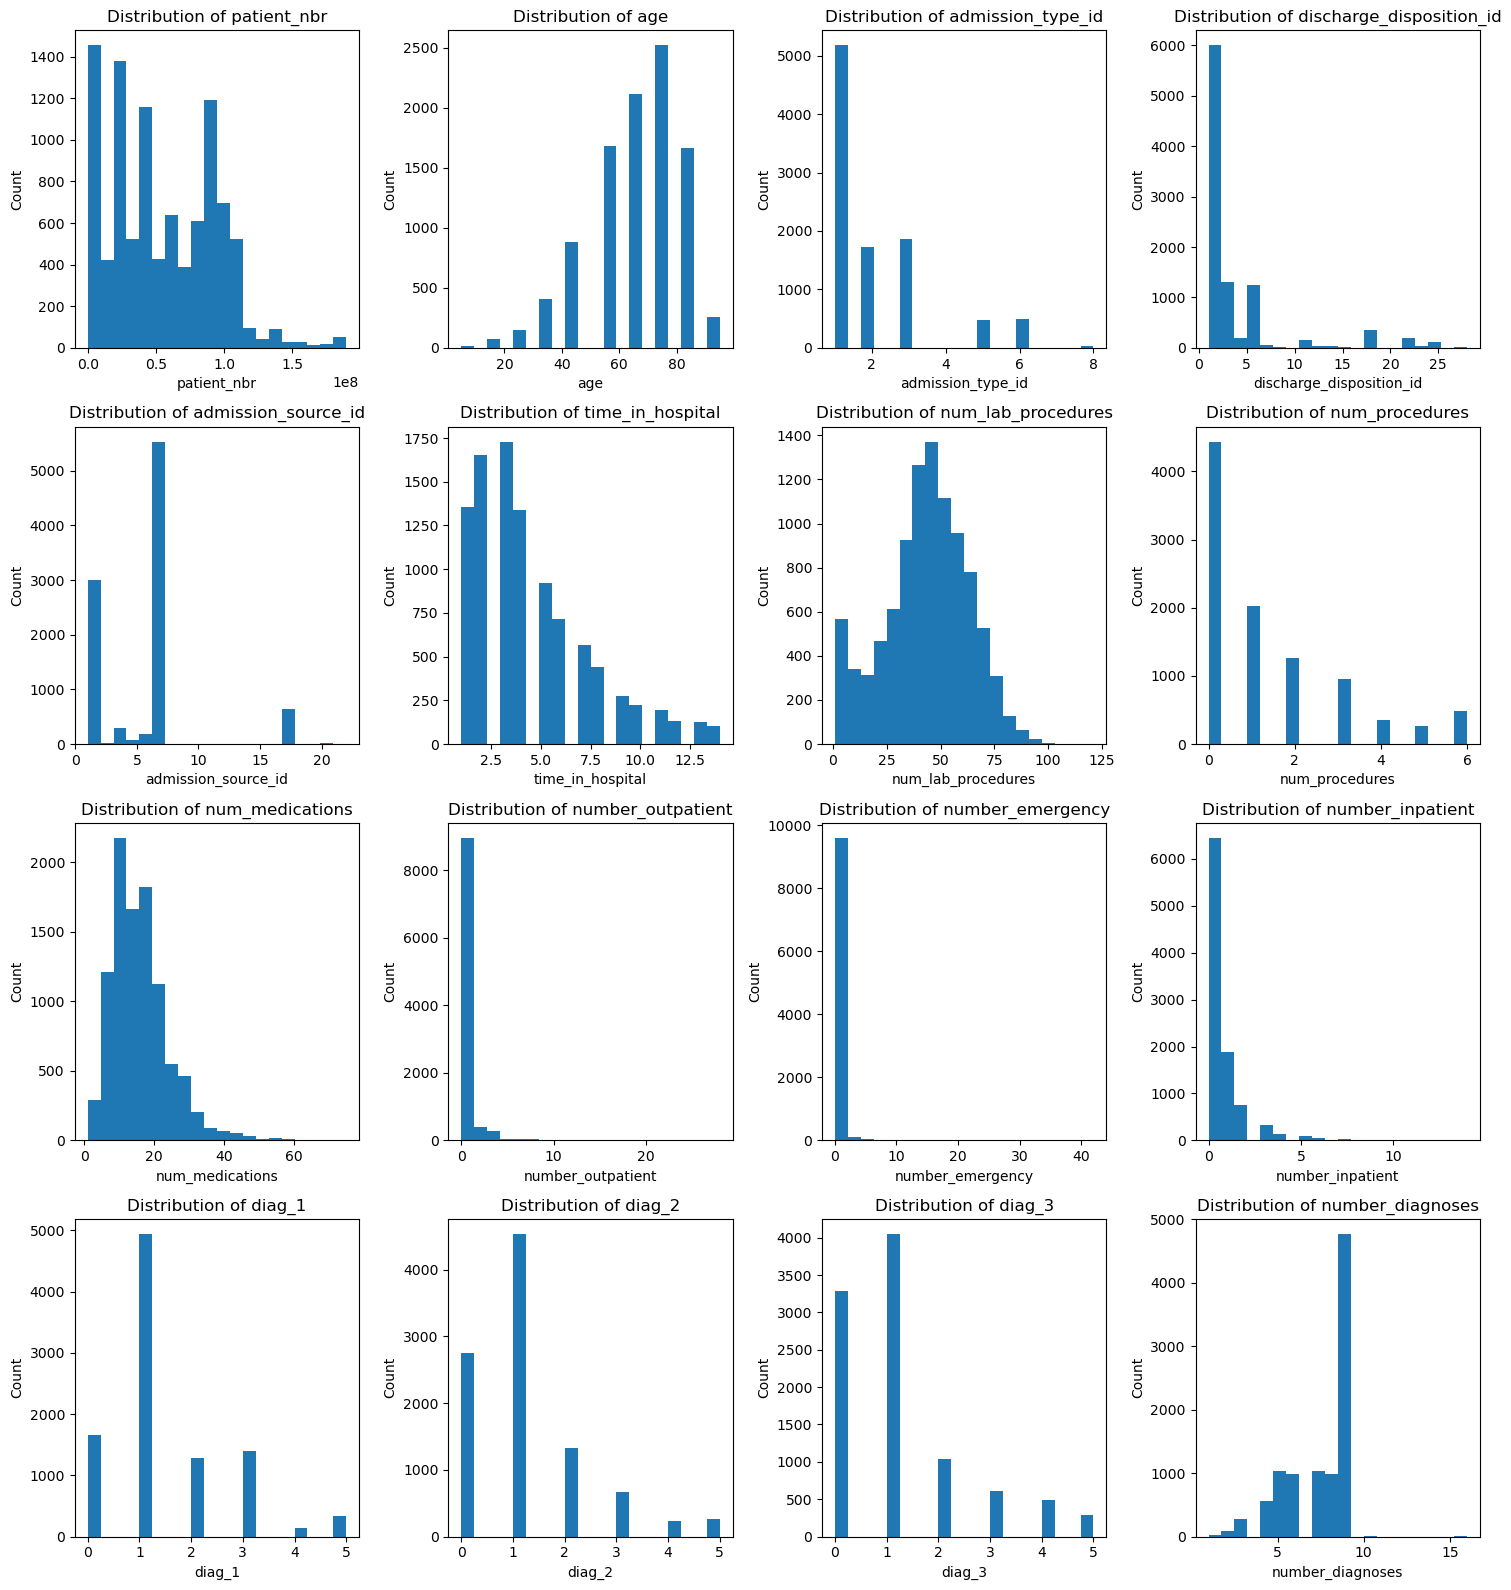

In [124]:


# Specify the number of subplots per row
subplots_per_row = 4

# Calculate the number of rows and columns needed
num_numerical = len(numeric_columns)
num_rows = math.ceil(num_numerical / subplots_per_row)
num_columns = min(subplots_per_row, num_numerical)

# Create a subplot grid for numerical variables
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4 * num_rows))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Create histogram plots for each numerical variable
for i, col in enumerate(numeric_columns):
    row_index = i // num_columns
    col_index = i % num_columns
    axes[row_index, col_index].hist(df_cleaned[col], bins=20)
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Count')

# Remove any empty subplots
for i in range(num_numerical, num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig('numerical_distribution.png')
# Show the plots
plt.show()



# Descriptive statistics

In [126]:
df_cleaned['age']

0       65.0
1       85.0
2       55.0
3       85.0
4       75.0
        ... 
9995    75.0
9996    45.0
9997    45.0
9998    65.0
9999    75.0
Name: age, Length: 9773, dtype: float64

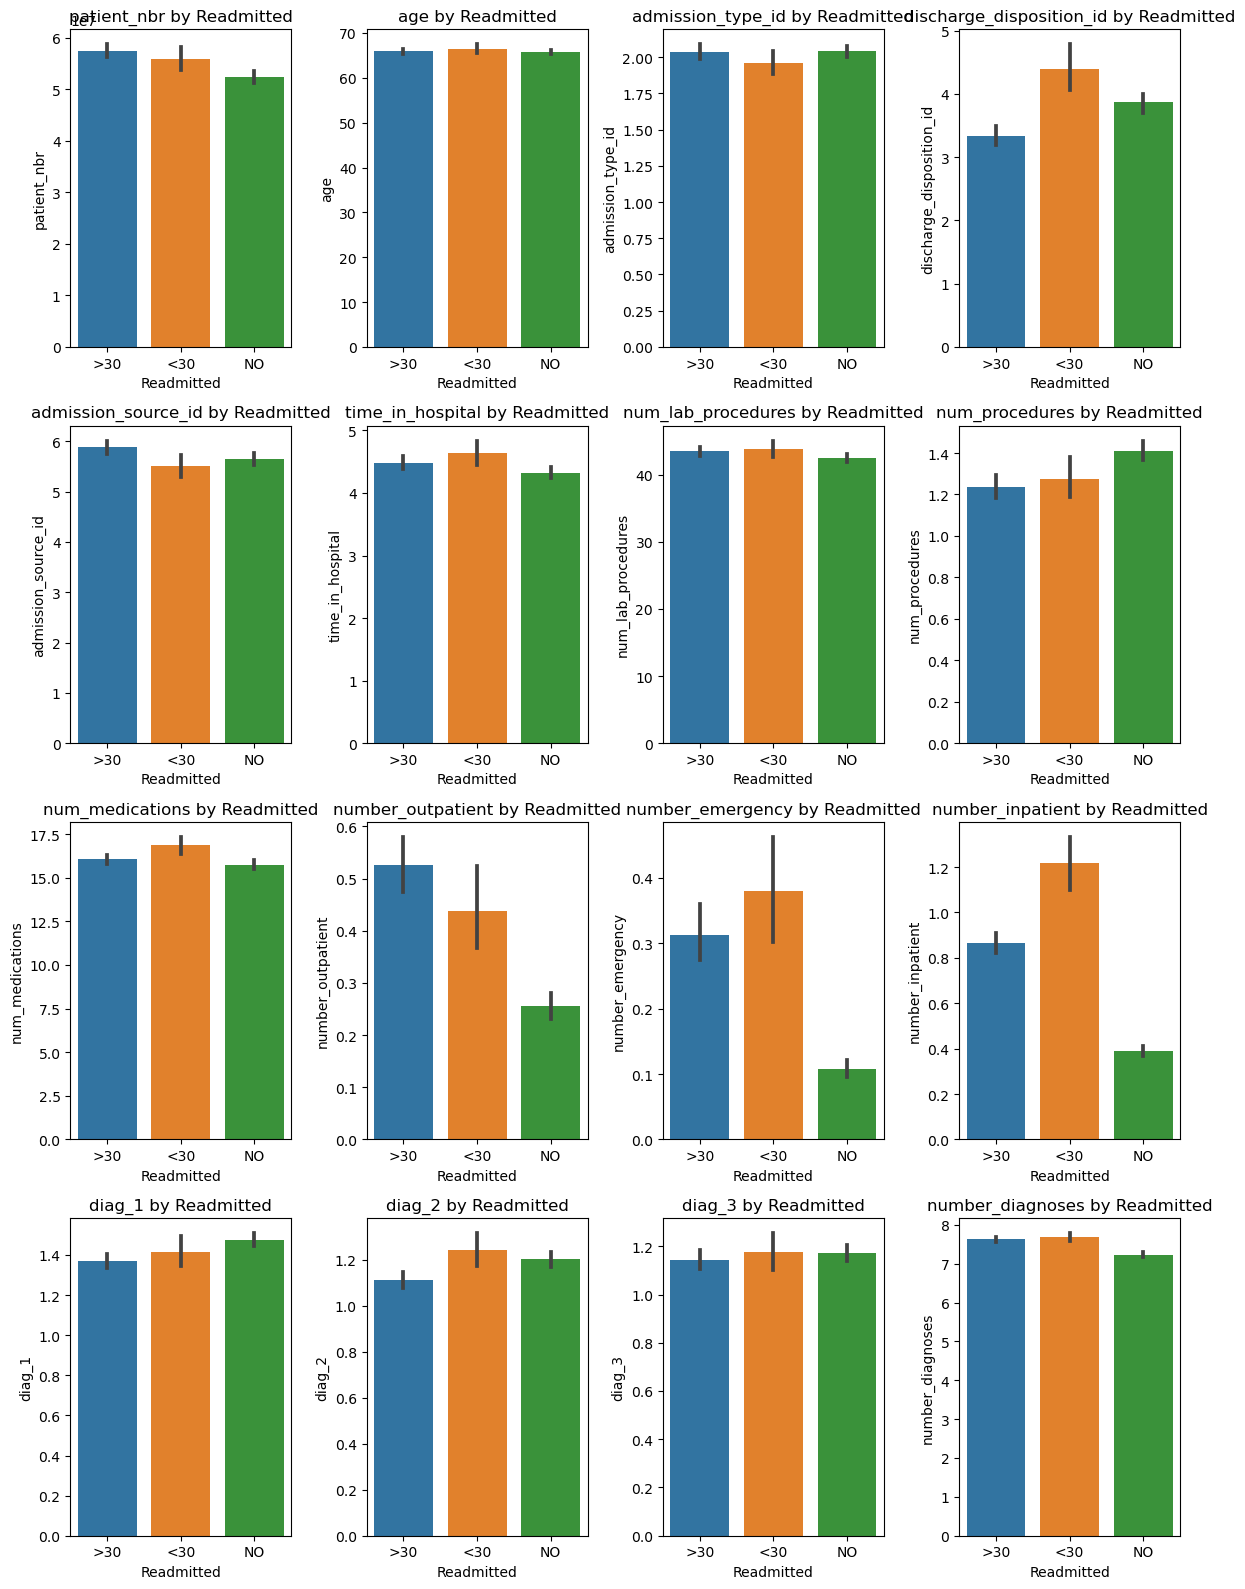

In [129]:
import math

# Determine the number of rows and columns for subplots
num_cols = 4  # Number of columns in the subplot grid
num_rows = math.ceil(len(numeric_columns) / num_cols)  # Number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Loop through each numeric column for analysis
for i, column in enumerate(numeric_columns):
    row_index = i // num_cols
    col_index = i % num_cols

    sns.barplot(data=df_cleaned, x='readmitted', y=column, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_xlabel('Readmitted')
    axes[row_index, col_index].set_ylabel(column)
    axes[row_index, col_index].set_title(f'{column} by Readmitted')

# Remove any empty subplots
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('bivariate analysis.png')
# Show the subplots
plt.show()



In [130]:
df_cleaned.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# Bivariate analysis

# Bivariate analysis between categorical data

In [131]:


# Initialize an empty list to store results
results_list = []

# Iterate through each categorical column
for col in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['readmitted'])

    # Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Store results in a dictionary
    result = {
        'Categorical Column': col,
        'Column 2':'readmitted',
        'Chi-squared': chi2,
        'P-value': p
    }

    # Append the result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_chi2_df = pd.DataFrame(results_list)

# Print or save the DataFrame as needed
results_chi2_df

,Categorical Column,Column 2,Chi-squared,P-value
0,race,readmitted,282.594801,7.379469e-55
1,gender,readmitted,37.461170,1.447272e-07
2,max_glu_serum,readmitted,51.922098,1.933304e-09
3,A1Cresult,readmitted,70.124299,3.855751e-13
4,metformin,readmitted,104.841777,2.445917e-20
5,insulin,readmitted,516.695761,2.126586e-108
6,change,readmitted,215.825001,1.362061e-47
7,diabetesMed,readmitted,386.510884,1.175514e-84
8,readmitted,readmitted,203532.000000,0.000000e+00


# Multi-variate analysis

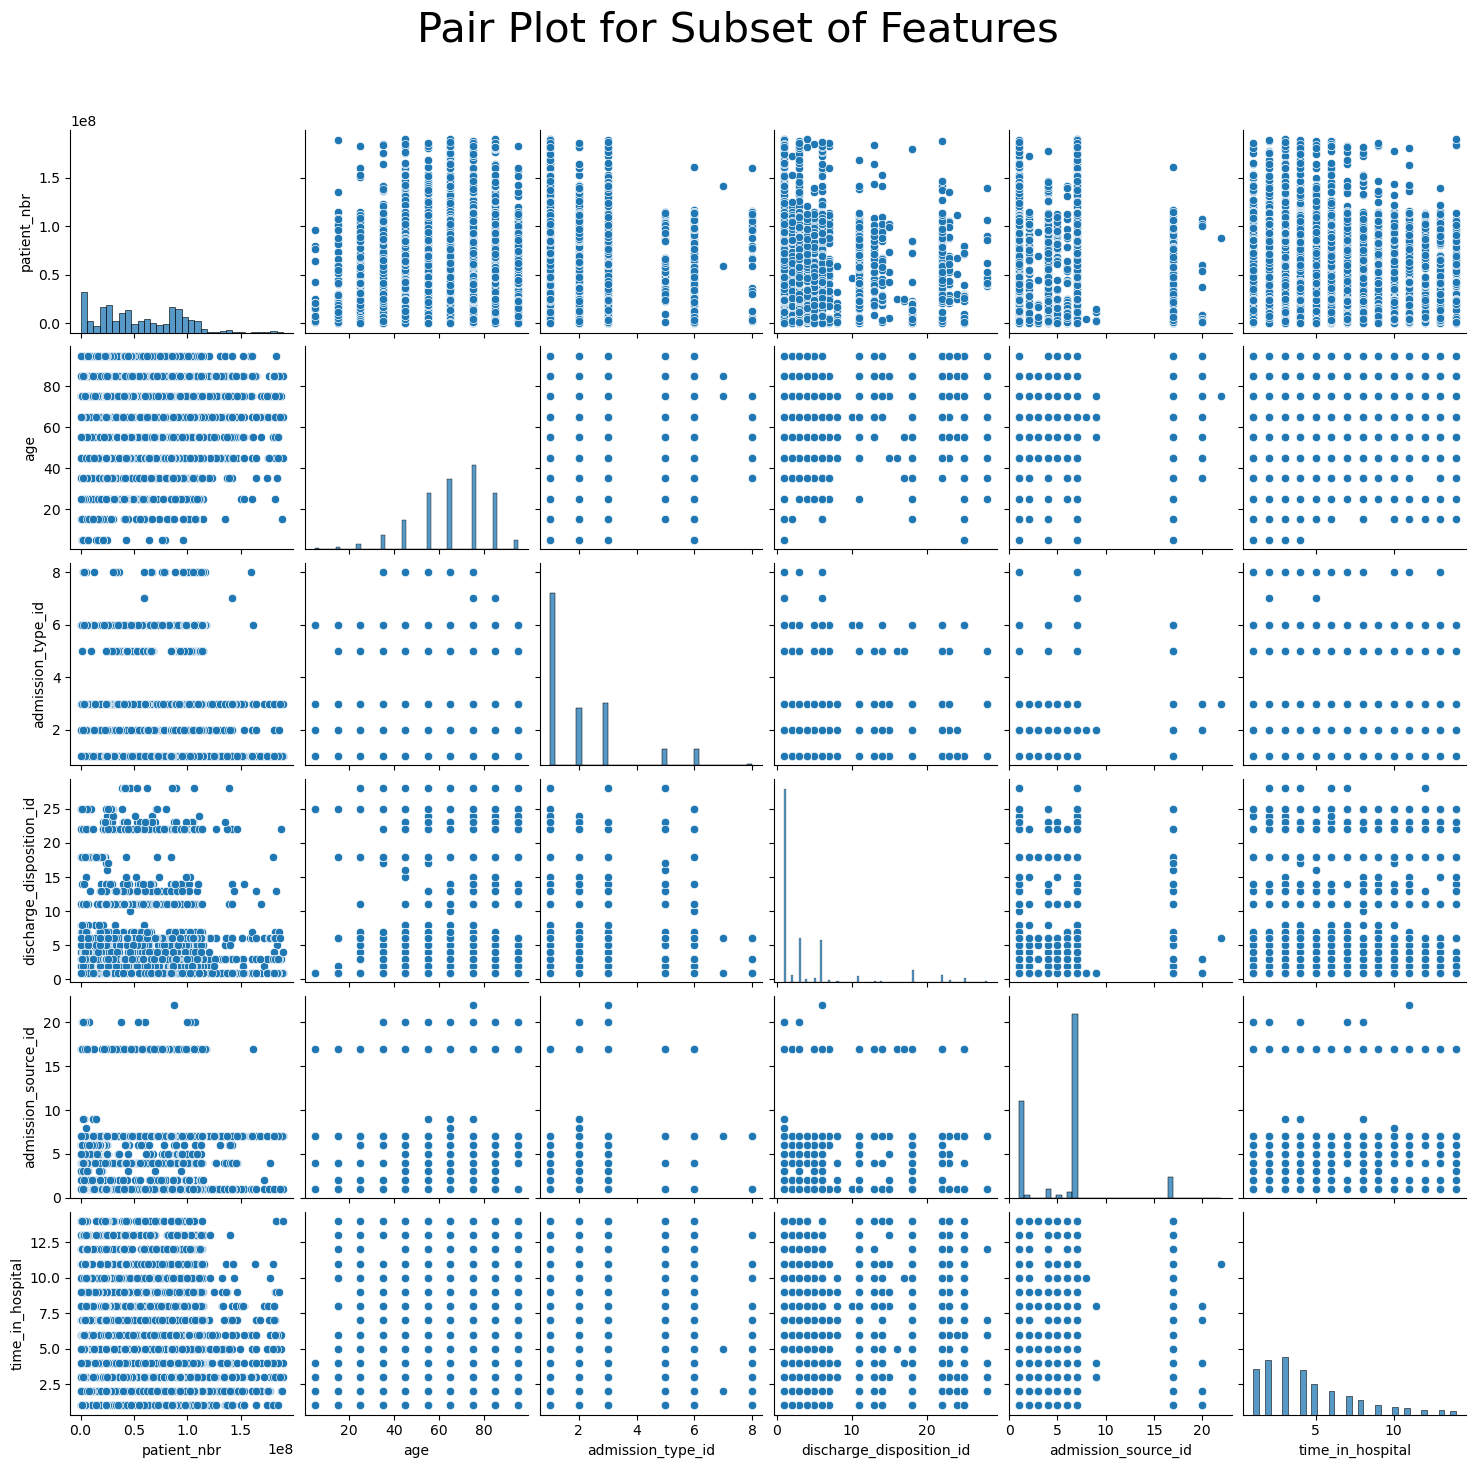

In [134]:
import seaborn as sns

# Select the subset of features you want to include in the pair plot
subset_features = ['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'insulin', 'patient_nbr',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital']

# Create the pair plot with the selected features
g = sns.pairplot(df_cleaned[subset_features])

# Set the title and adjust the plot
g.fig.suptitle('Pair Plot for Subset of Features', fontsize=30)
g.fig.subplots_adjust(top=0.9)

# Save the pair plot as an image
g.savefig('pairplot_subset.png')

# Show the pair plot
plt.show()


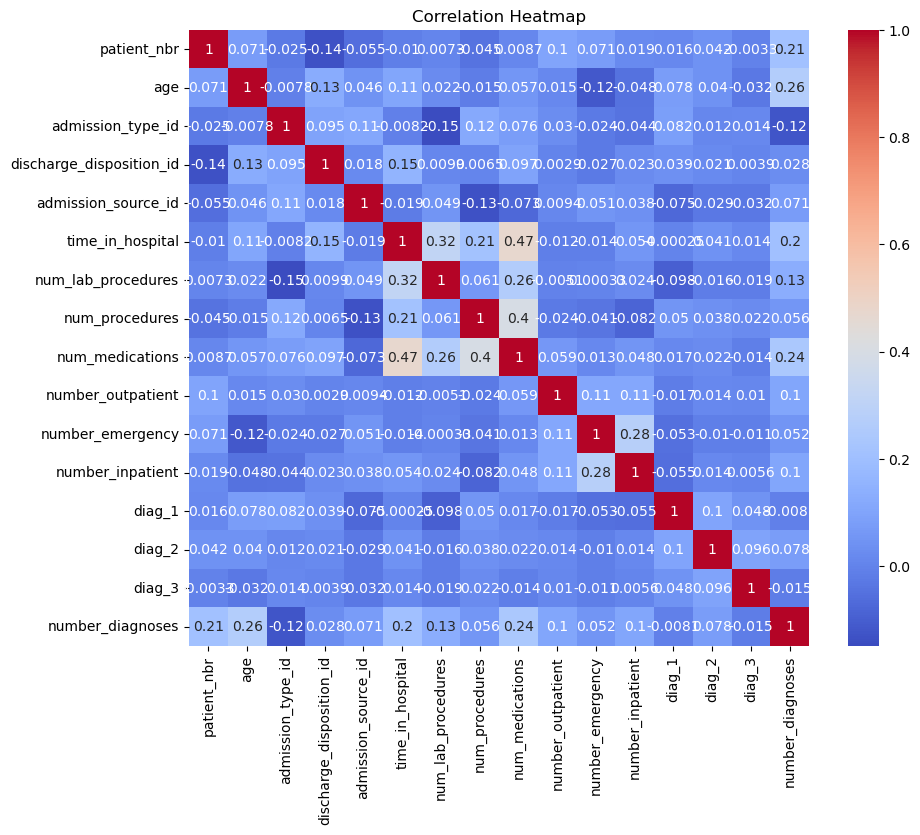

In [135]:
#Heatmap
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

# performing encoding for categorical data

In [138]:
categorical_columns.remove('readmitted')

In [139]:
categorical_columns

['race',
 'gender',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'insulin',
 'change',
 'diabetesMed']

In [140]:
df_cleaned['race'].value_counts()

Caucasian          7465
AfricanAmerican    1880
Hispanic            211
Other               156
Asian                61
Name: race, dtype: int64

# Making predictive system for readmission

In [141]:
df_cleaned.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [142]:
# df_cleaned['readmitted'].replace(['>30', '<30'], 'Yes', inplace=True)

In [143]:
df_cleaned['readmitted'].value_counts()

NO     5275
>30    3475
<30    1023
Name: readmitted, dtype: int64

In [144]:
df_cleaned.shape

(9773, 25)

In [145]:
# Data encoding for readmitted
df_cleaned.readmitted=[1 if each=='<30' else 0 for each in df_cleaned.readmitted]

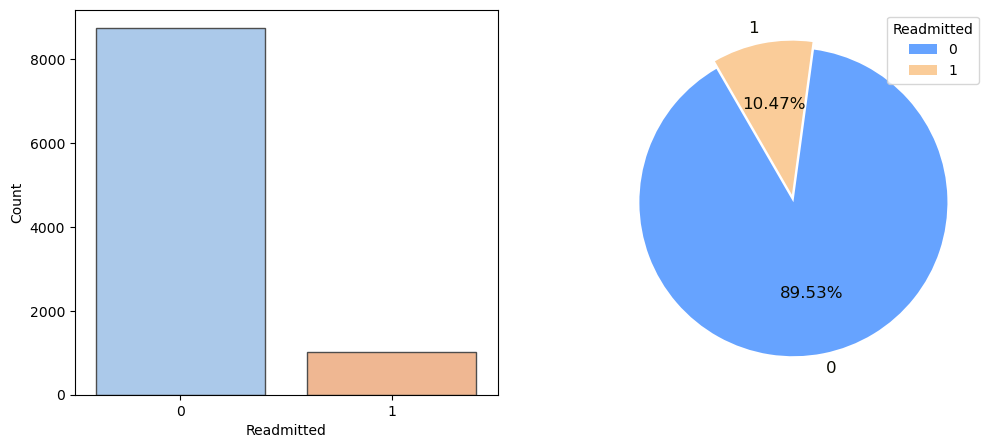

In [146]:
# Creating visualization to show changes and visualising distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
labels = ['0', '1']
colors = ['#66a3ff', '#facc99']

# Countplot
sns.countplot(x=df_cleaned.readmitted, data=df_cleaned, palette="pastel", ax=ax[0], edgecolor=".3")
ax[0].set_xlabel('Readmitted')
ax[0].set_ylabel('Count')

# Pie chart
pie = df_cleaned.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=colors,
                                                    labels=labels, explode=(0, 0.05), startangle=120,
                                                    textprops={'fontsize': 12, 'color': '#0a0a00'})
ax[1].set_ylabel('')

# Add a legend
ax[1].legend(labels, title='Readmitted', loc='upper right')

plt.savefig('encoded_chart_readmitted.png')
plt.show()


In [147]:
df_cleaned['readmitted'].value_counts()

0    8750
1    1023
Name: readmitted, dtype: int64

In [148]:
df_cleaned.shape

(9773, 25)

In [149]:
# # dropping the unwanted columns which doesn't give any information
# df_cleaned=df_cleaned.drop()

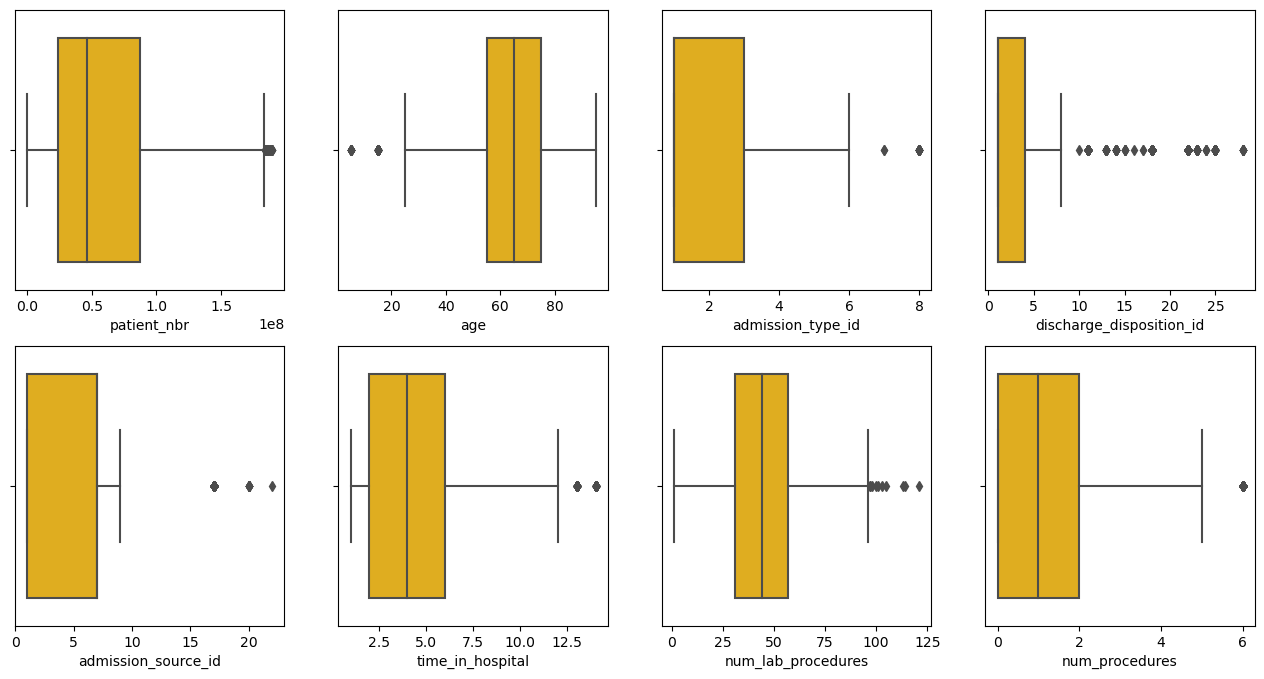

In [150]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])  # palette = rocket, Wistia
            count = count+1
            
boxplot_for_outlier(df_cleaned,numeric_columns)

In [151]:
from scipy import stats
# Function to remove outliers
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df[columns]))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

# Remove outliers from your DataFrame
df_cleaned_no_outliers = remove_outliers_zscore(df_cleaned, numeric_columns)

# Now df_cleaned_no_outliers contains your data with outliers removed.
df_cleaned_no_outliers

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,insulin,change,diabetesMed,readmitted
1,90337608,Caucasian,Female,85.0,1,1,7,4,50,0,...,0,0,7,None,None,No,Steady,No,Yes,0
3,24419052,Caucasian,Female,85.0,1,3,17,4,18,0,...,2,3,9,Norm,None,No,No,No,No,0
4,53116200,Caucasian,Male,75.0,2,1,1,4,43,0,...,1,0,8,None,>8,No,No,Ch,Yes,0
5,115014015,Caucasian,Male,85.0,1,1,7,3,22,0,...,1,1,9,None,None,Steady,No,Ch,Yes,0
6,43663446,Caucasian,Male,75.0,1,6,1,3,27,0,...,1,3,9,None,None,No,Steady,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,71319240,Caucasian,Male,85.0,1,4,7,2,1,0,...,3,1,9,None,None,No,Steady,No,Yes,0
9995,72822798,AfricanAmerican,Female,75.0,1,1,7,1,20,0,...,1,1,4,None,None,No,Steady,No,Yes,0
9996,85716540,Caucasian,Male,45.0,1,1,7,1,75,0,...,0,1,7,>300,None,No,No,No,No,0
9997,84770820,Caucasian,Female,45.0,1,1,7,2,46,6,...,1,1,5,None,None,No,No,No,No,0


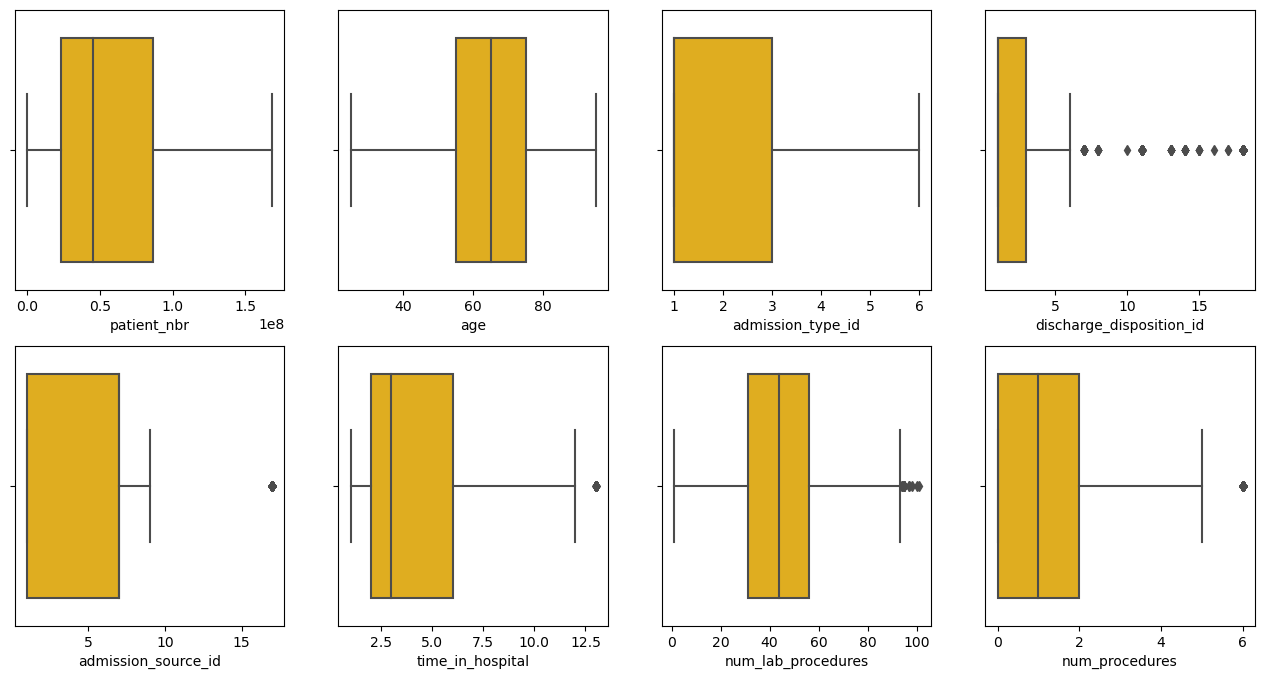

In [152]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])  # palette = rocket, Wistia
            count = count+1
            
boxplot_for_outlier(df_cleaned_no_outliers,numeric_columns)

In [153]:
df_cleaned_no_outliers['gender'].value_counts()

Female    4360
Male      3558
Name: gender, dtype: int64

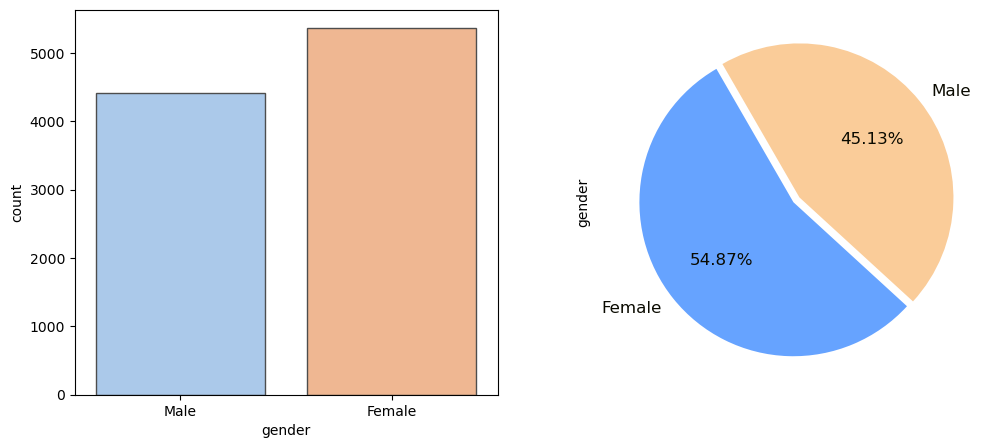

In [154]:
# plotting gender distribution
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=df_cleaned.gender, data=df_cleaned, palette="pastel",ax=ax[0], edgecolor=".3")
df_cleaned.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})

plt.show()

C:\Users\grgro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grgro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\grgro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


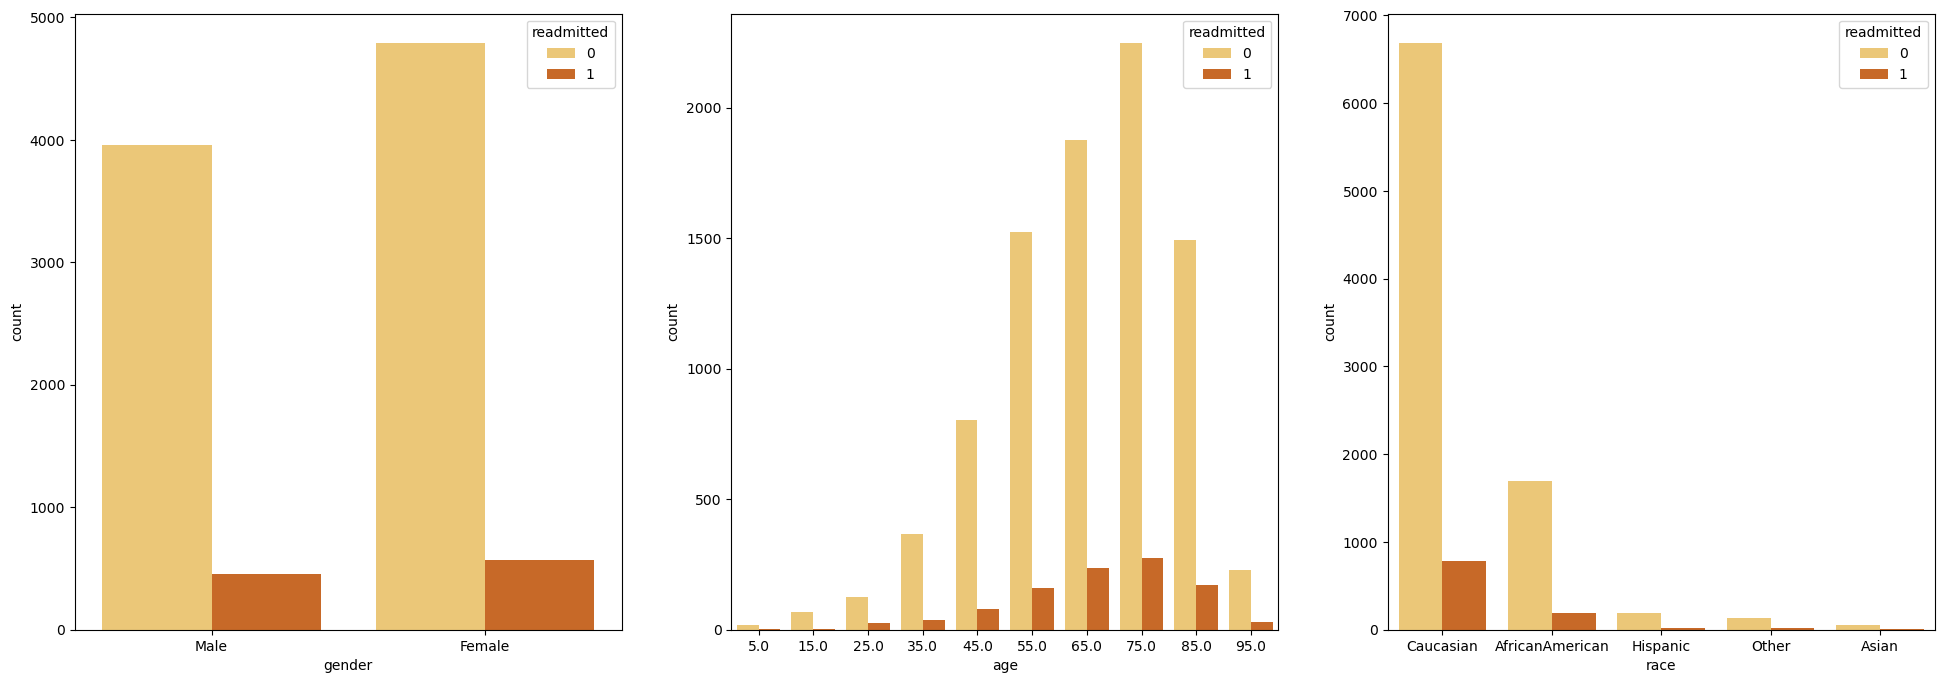

In [155]:
# visualising age gender and race visualization
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(df_cleaned[i], hue=df_cleaned.readmitted, palette='YlOrBr', ax=ax[count]);
    count = count+1

In [156]:
df_cleaned['insulin'].value_counts()

No        4540
Steady    2876
Down      1233
Up        1124
Name: insulin, dtype: int64

In [157]:
# Define the mapping for ordinal encoding
mapping = {'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1, '>7':1,'>8':1,'Norm':0,'None':-99,'>200':1,'>300':1}

# Apply the mapping to the "metformin" column
df_cleaned['metformin'] = df_cleaned['metformin'].map(mapping)
df_cleaned['insulin']=df_cleaned['insulin'].map(mapping)
df_cleaned['A1Cresult'] = df_cleaned['A1Cresult'].map(mapping)
df_cleaned['max_glu_serum'] = df_cleaned['max_glu_serum'].map(mapping)


In [158]:
# Define the mapping for ordinal encoding for race
mapping = {'Caucasian': 0, 'AfricanAmerican': 1,'Hispanic':2,'Other':3,'Asian':4}

# Apply the mapping to the "metformin" column
df_cleaned['race'] = df_cleaned['race'].map(mapping)

In [159]:
# Define the mapping for ordinal encoding for diabetesMed, change, gender
mapping = {'No': 0, 'Yes': 1,'Male':1,'Female':0,'Unknown/Invalid':-99,'Ch':1,'No':0}

# Apply the mapping to the "metformin" column
df_cleaned['diabetesMed'] = df_cleaned['diabetesMed'].map(mapping)
df_cleaned['gender'] = df_cleaned['gender'].map(mapping)
df_cleaned['change'] = df_cleaned['change'].map(mapping)

In [160]:
# df_cleaned['readmitted']=df_cleaned['readmitted'].astype(str)

In [161]:
df_cleaned.dtypes

patient_nbr                   int64
race                          int64
gender                        int64
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                        int64
diag_2                        int64
diag_3                        int64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
insulin                       int64
change                        int64
diabetesMed                   int64
readmitted                    int64
dtype: object

In [162]:
# Train test split
new_df=df_cleaned.copy()
X = new_df.drop(columns="readmitted", axis=1)
Y = new_df.readmitted

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [164]:
new_df.dtypes

patient_nbr                   int64
race                          int64
gender                        int64
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                        int64
diag_2                        int64
diag_3                        int64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
insulin                       int64
change                        int64
diabetesMed                   int64
readmitted                    int64
dtype: object

In [165]:
def calc_specificity(y_actual, y_pred, thresh): 
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('fscore:%.3f'%fscore)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision,fscore, specificity

In [166]:
thresh = 0.5

In [168]:
from sklearn.linear_model import LogisticRegression
# logistic regression
log_model = LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42).fit(X_train, y_train)

In [169]:
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_val_preds = log_model.predict_proba(X_test)[:,1]

print("Logistic Regression")
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_fscore, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_val_auc, lr_val_accuracy, lr_val_recall, \
    lr_val_precision,lr_val_fscore, lr_val_specificity = print_report(y_test,y_val_preds, thresh)

Logistic Regression
Training:
AUC:0.518
accuracy:0.104
recall:1.000
precision:0.104
fscore:0.188
specificity:0.000
 
Validation:
AUC:0.495
accuracy:0.108
recall:1.000
precision:0.108
fscore:0.195
specificity:0.000
 


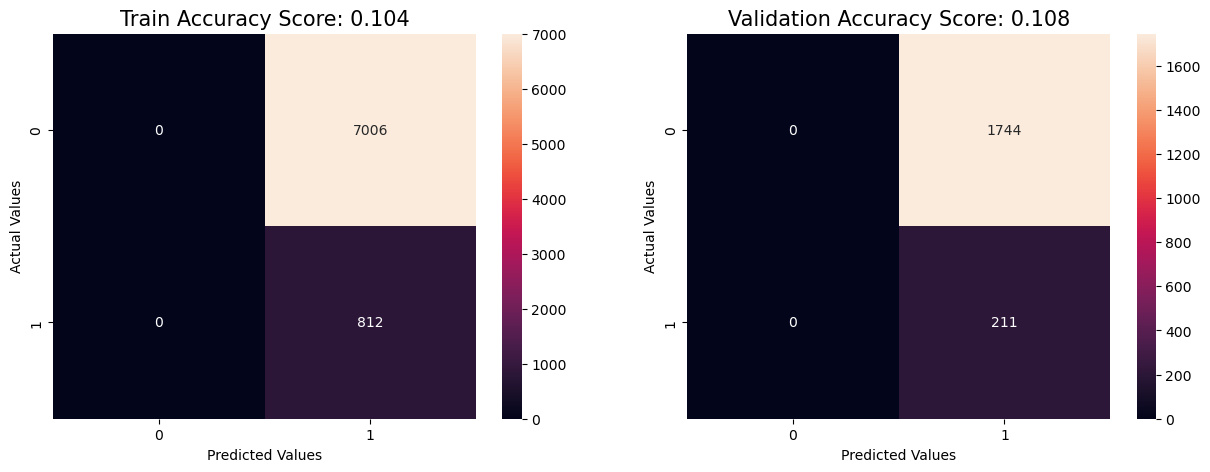

In [170]:
# Visualising the accuracy of the model using heatmap

predictions = log_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = log_model.predict(X_test)
val_score = round(accuracy_score(y_test, predictions), 3)
cm_val = cm(y_test, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

# Random Forest Classifier

In [171]:
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [172]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_test)[:,1]

print("Random Forest")
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision,rf_train_fscore, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_val_auc, rf_val_accuracy, rf_val_recall, rf_val_precision,rf_val_fscore, rf_val_specificity = print_report(y_test,y_val_preds, thresh)

Random Forest
Training:
AUC:0.671
accuracy:0.896
recall:0.000
precision:0.000
fscore:0.000
specificity:1.000
 
Validation:
AUC:0.605
accuracy:0.892
recall:0.000
precision:0.000
fscore:0.000
specificity:1.000
 


C:\Users\grgro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\grgro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


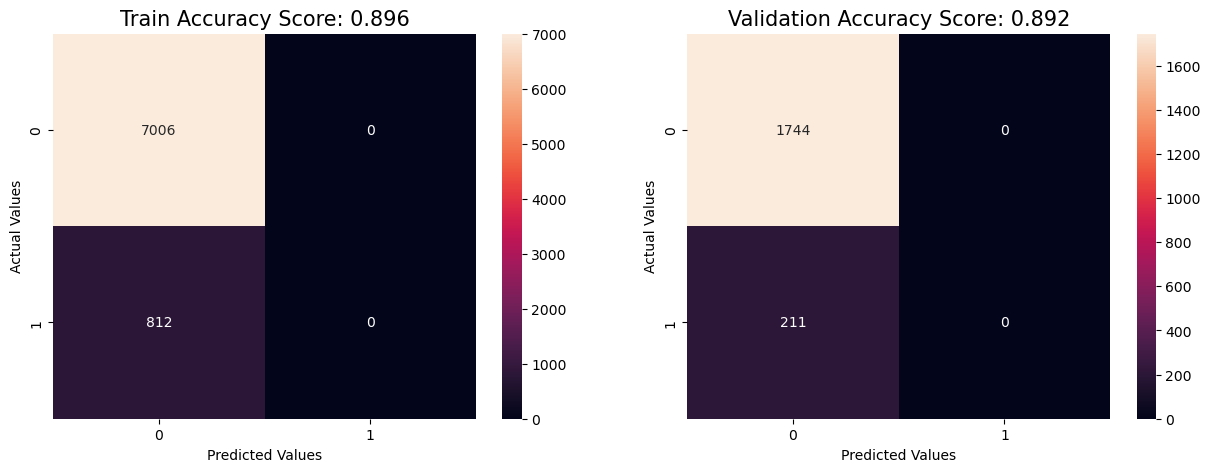

In [173]:
# confusion matrix
predictions = random_forest_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = random_forest_model.predict(X_test)
val_score = round(accuracy_score(y_test, predictions), 3)
cm_val = cm(y_test, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

# Gradient Boosting Classifier

In [174]:
from sklearn.ensemble import GradientBoostingClassifier
# Defining the model
gradient_model = GradientBoostingClassifier(random_state=42)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [175]:
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_test)[:,1]

print("Gradient Boosting")
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision,gbc_train_fscore, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_val_auc, gbc_val_accuracy, gbc_val_recall, gbc_val_precision, gbc_val_fscore, gbc_val_specificity = print_report(y_test,y_val_preds, thresh)

Gradient Boosting
Training:
AUC:0.765
accuracy:0.903
recall:0.070
precision:0.934
fscore:0.131
specificity:0.999
 
Validation:
AUC:0.623
accuracy:0.894
recall:0.033
precision:0.636
fscore:0.063
specificity:0.998
 


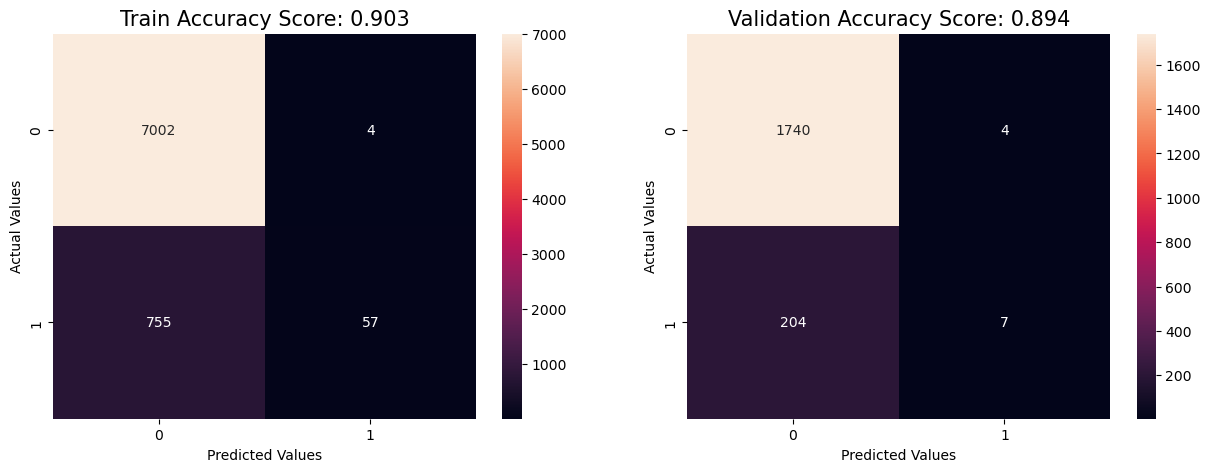

In [176]:
# Confusion matrix
predictions = gradient_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = gradient_model.predict(X_test)
val_score = round(accuracy_score(y_test, predictions), 3)
cm_val = cm(y_test, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

In [177]:
df_cleaned.shape

(9773, 25)

In [179]:
from sklearn.model_selection import GridSearchCV
# Hyper parameter tuning of gradient boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42], 
    'max_features': ['auto', 'sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=gradient_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [180]:
best_params

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [186]:
best_gb_model=GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=0.01, max_features='auto',
                           min_samples_leaf=4, random_state=42)

In [187]:
y_train_preds_best = best_gb_model.predict_proba(X_train)[:,1]
y_val_preds_best = best_gb_model.predict_proba(X_test)[:,1]

print("Gradient Boosting")
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision,gbc_train_fscore, gbc_train_specificity = print_report(y_train,y_train_preds_best, thresh)
print('Validation:')
gbc_val_auc, gbc_val_accuracy, gbc_val_recall, gbc_val_precision, gbc_val_fscore, gbc_val_specificity = print_report(y_test,y_val_preds_best, thresh)

Gradient Boosting
Training:
AUC:0.656
accuracy:0.896
recall:0.000
precision:0.000
fscore:0.000
specificity:1.000
 
Validation:
AUC:0.629
accuracy:0.892
recall:0.000
precision:0.000
fscore:0.000
specificity:1.000
 


C:\Users\grgro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\grgro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Finalalized model accuracy


In [188]:
# Predicting on both training and testing sets
y_train_preds_best = gradient_model.predict_proba(X_train)[:,1]
y_val_preds_best = gradient_model.predict_proba(X_test)[:,1]

print("Gradient Boosting")
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision,gbc_train_fscore, gbc_train_specificity = print_report(y_train,y_train_preds_best, thresh)
print('Validation:')
gbc_val_auc, gbc_val_accuracy, gbc_val_recall, gbc_val_precision, gbc_val_fscore, gbc_val_specificity = print_report(y_test,y_val_preds_best, thresh)

Gradient Boosting
Training:
AUC:0.765
accuracy:0.903
recall:0.070
precision:0.934
fscore:0.131
specificity:0.999
 
Validation:
AUC:0.623
accuracy:0.894
recall:0.033
precision:0.636
fscore:0.063
specificity:0.998
 
